# **Import Libraries and get dataset**

In [508]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score,silhouette_samples

In [509]:
dataset = pd.read_csv('data/data-tc.csv')

In [510]:
dataset.head()

,B_Req,R_Priority,FP,Complexity,Time,Cost
0,1,94,"TC#2027,TC#2928,TC#2053",3,4.0,60.0
1,2,197,"TC#3269,TC#1752,TC#1042",3,4.0,60.0
2,3,163,"TC#2843,TC#3332,TC#805,TC#2785",3,5.0,75.0
3,4,103,"TC#1618,TC#953,TC#1368",1,4.0,20.0
4,5,70,"TC#235,TC#3170,TC#2423",5,4.0,100.0


In [511]:
isCount = dataset['FP'].count()
print(f'Total Data is {isCount}')

Total Data is 3314


# **Preprocess Data**

In [512]:
label_encoder = LabelEncoder()
dataset["B_Req"] = label_encoder.fit_transform(dataset["B_Req"])
dataset["R_Priority"] = label_encoder.fit_transform(dataset["R_Priority"])

In [513]:
dataset["FP"] = dataset["FP"].apply(lambda x: len(x.split(",")))

scaler = StandardScaler()
dataset[["Complexity", "Time", "Cost"]] = scaler.fit_transform(dataset[["Complexity", "Time", "Cost"]])

In [514]:
dataset.fillna(dataset.mean(), inplace=True)
dataset = dataset[(dataset["Complexity"] > -3) & (dataset["Complexity"] < 3)]

In [515]:
dataset.head()

,B_Req,R_Priority,FP,Complexity,Time,Cost
0,0,62,3,-0.023581,0.384733,-0.019140
1,1,165,3,-0.023581,0.384733,-0.019140
2,2,131,4,-0.023581,1.175190,0.346027
3,3,71,3,-1.244620,0.384733,-0.992918
4,4,38,3,1.197458,0.384733,0.954639


In [516]:
X = dataset[['Complexity', 'Time', 'Cost']]
# X = dataset.iloc[:, 1:]

# **K-Means**

In [517]:
from sklearn.cluster import KMeans

In [518]:
kmeans = KMeans(n_clusters=3, random_state=0,max_iter=50)
dataset['Class'] = kmeans.fit_predict(dataset[['Complexity', 'Time', 'Cost']] )

In [519]:
score_avg = silhouette_score(X, dataset['Class'])
print(f"Score: {score_avg}")

Score: 0.48418821015031827


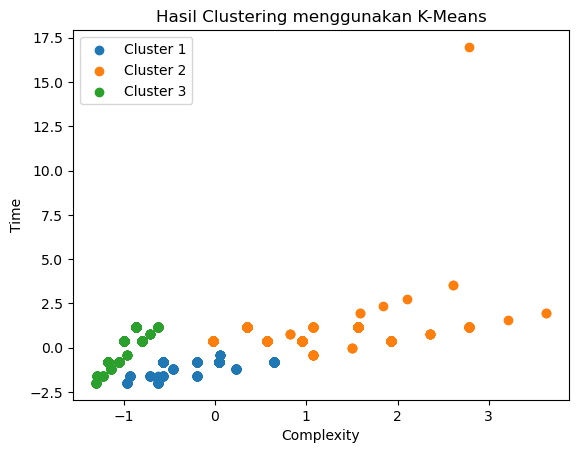

In [520]:
for cluster_num in range(3):
    cluster_data = dataset[dataset['Class'] == cluster_num]
    plt.scatter(
        # cluster_data['Complexity'], 
        cluster_data['Cost'], 
        cluster_data['Time'], 
        label=f'Cluster {cluster_num + 1}')

plt.xlabel('Complexity')
plt.ylabel('Time')
plt.legend()
plt.title('Hasil Clustering menggunakan K-Means')
plt.show()

**Split Data**

In [521]:
X_train, X_test = train_test_split(dataset, test_size=0.2, random_state=42)

In [522]:
dataset.to_csv('data/kmeans/data-preprocess.csv', index=False)

X_train.to_csv('data/kmeans/data-train.csv', index=False)
X_test.to_csv('data/kmeans/data-test.csv', index=False)

In [523]:
dataset.drop(['Class'], axis=1, inplace=True)

# **Hierarchical**

In [524]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg_clustering.fit(X)

dataset['Class'] = agg_clustering.labels_


In [525]:
silhouette = silhouette_score(X, dataset['Class'])
print(f"Score: {silhouette}")

Score: 0.43819260583179687


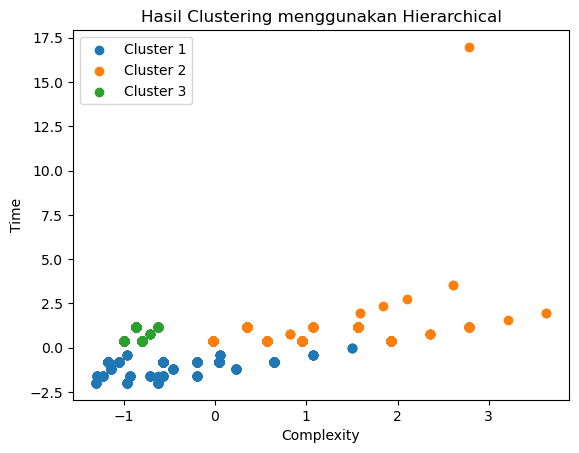

In [526]:
for cluster_num in range(3):
    cluster_data = dataset[dataset['Class'] == cluster_num]
    plt.scatter(
        # cluster_data['Complexity'], 
        cluster_data['Cost'], 
        cluster_data['Time'], 
        label=f'Cluster {cluster_num + 1}')

plt.xlabel('Complexity')
plt.ylabel('Time')
plt.legend()
plt.title('Hasil Clustering menggunakan Hierarchical')
plt.show()

In [527]:
dataset.drop(['Class'], axis=1, inplace=True)

**Split Data**

In [528]:
X_train, X_test = train_test_split(dataset, test_size=0.2, random_state=42)

In [529]:
dataset.to_csv('data/hierarchical/data-preprocess.csv', index=False)

X_train.to_csv('data/hierarchical/data-train.csv', index=False)
X_test.to_csv('data/hierarchical/data-test.csv', index=False)

# **DBSCAN**

In [530]:
from sklearn.cluster import DBSCAN

# Menerapkan DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)

# Menambahkan label kelompok ke dalam dataset
dataset['Class'] = dbscan.labels_


In [531]:
silhouette = silhouette_score(X, dataset['Class'])
print(f"Score: {silhouette}")

Score: 0.9341457514848557


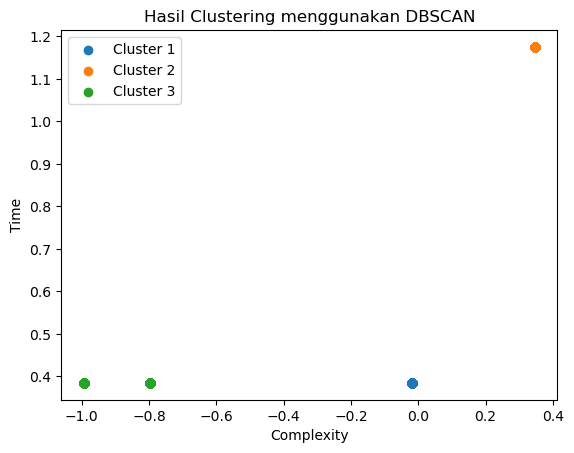

In [532]:
for cluster_num in range(3):
    cluster_data = dataset[dataset['Class'] == cluster_num]
    plt.scatter(
        # cluster_data['Complexity'], 
        cluster_data['Cost'], 
        cluster_data['Time'], 
        label=f'Cluster {cluster_num + 1}')

plt.xlabel('Complexity')
plt.ylabel('Time')
plt.legend()
plt.title('Hasil Clustering menggunakan DBSCAN')
plt.show()

**Split Data**

In [533]:
X_train, X_test = train_test_split(dataset, test_size=0.2, random_state=42)

In [534]:
dataset.to_csv('data/DBSCAN/data-preprocess.csv', index=False)

X_train.to_csv('data/DBSCAN/data-train.csv', index=False)
X_test.to_csv('data/DBSCAN/data-test.csv', index=False)

In [535]:
dataset.drop(['Class'], axis=1, inplace=True)